# 6.5: Unsupervised Machine Learning: Clustering

## 1 Importing Libraries

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.decomposition import PCA
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [76]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

## 2 Importing Data, Cleaning and Wrangling

In [77]:
# Creating a path
path = r'C:\Users\ivand\Desktop\6.1 - CitiBike Project Folder'

In [78]:
# Importing Data set
df_bikes = pd.read_csv(os.path.join(path, '02 Data','Prepared Data','CitiBikes_New.csv'))

In [79]:
# Checking data set
df_bikes.head()

,Unnamed: 0,day_of_week,start_of_ride,start_station_name,start_station_latitude,start_station_longitude,end_of_ride,end_station_name,end_station_latitude,end_station_longitude,trip_duration_in_seconds,subscriber,year_of_birth,gender,start_of_ride_new,Start_Date,Start_Time
0,0,Mon,2013-09-09 18:18:55,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968,Female,2013-09-09 18:18:55,2013-09-09,18
1,1,Thu,2013-09-12 18:38:53,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983,Male,2013-09-12 18:38:53,2013-09-12,19
2,2,Wed,2013-09-18 19:44:04,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989,Male,2013-09-18 19:44:04,2013-09-18,20
3,3,Sat,2013-09-28 11:54:37,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988,Female,2013-09-28 11:54:37,2013-09-28,12
4,4,Sat,2013-09-07 18:08:22,8 Ave & W 31 St,40.750450,-73.994811,2013-09-07 18:46:38,E 31 St & 3 Ave,40.743943,-73.979661,2296,Non-Subscriber,1978,Unknown,2013-09-07 18:08:22,2013-09-07,18


In [80]:
df_bikes.dtypes

Unnamed: 0                    int64
day_of_week                  object
start_of_ride                object
start_station_name           object
start_station_latitude      float64
start_station_longitude     float64
end_of_ride                  object
end_station_name             object
end_station_latitude        float64
end_station_longitude       float64
trip_duration_in_seconds      int64
subscriber                   object
year_of_birth                 int64
gender                       object
start_of_ride_new            object
Start_Date                   object
Start_Time                    int64
dtype: object

In [81]:
# Dropping all non-numerical columns
df_bikes_1 = df_bikes.drop(columns=['Unnamed: 0','day_of_week','start_station_name','end_station_longitude','end_station_latitude','start_station_longitude','start_station_latitude','end_station_name', 'start_of_ride_new', 'subscriber', 'gender', 'start_of_ride','end_of_ride'])

In [82]:
df_bikes_1.head()

,trip_duration_in_seconds,year_of_birth,Start_Date,Start_Time
0,993,1968,2013-09-09,18
1,581,1983,2013-09-12,19
2,361,1989,2013-09-18,20
3,561,1988,2013-09-28,12
4,2296,1978,2013-09-07,18


In [83]:
df_bikes_1.dtypes

trip_duration_in_seconds     int64
year_of_birth                int64
Start_Date                  object
Start_Time                   int64
dtype: object

### Converting the Start_Date to be an integer

In [84]:
df_bikes_1['Start_Date'] = pd.to_datetime(df_bikes_1['Start_Date'])

In [85]:
df_bikes_1['Formatted_Start_Date'] = df_bikes_1['Start_Date'].dt.strftime('%Y %m %d')

In [86]:
df_bikes_1['Integer_Start_Date'] = df_bikes_1['Formatted_Start_Date'].str.replace(' ', '').astype(int)

In [87]:
df_bikes_1.head()

,trip_duration_in_seconds,year_of_birth,Start_Date,Start_Time,Formatted_Start_Date,Integer_Start_Date
0,993,1968,2013-09-09,18,2013 09 09,20130909
1,581,1983,2013-09-12,19,2013 09 12,20130912
2,361,1989,2013-09-18,20,2013 09 18,20130918
3,561,1988,2013-09-28,12,2013 09 28,20130928
4,2296,1978,2013-09-07,18,2013 09 07,20130907


In [88]:
df_bikes_1.dtypes

trip_duration_in_seconds             int64
year_of_birth                        int64
Start_Date                  datetime64[ns]
Start_Time                           int64
Formatted_Start_Date                object
Integer_Start_Date                   int32
dtype: object

In [89]:
# Dropping and renaming columns
df_bikes_1 = df_bikes_1.drop(columns=['Start_Date','Formatted_Start_Date'])

In [90]:
df_bikes_1.head()

,trip_duration_in_seconds,year_of_birth,Start_Time,Integer_Start_Date
0,993,1968,18,20130909
1,581,1983,19,20130912
2,361,1989,20,20130918
3,561,1988,12,20130928
4,2296,1978,18,20130907


In [91]:
df_bikes_1.rename(columns = {'trip_duration_in_seconds' : 'trip_seconds', 'Integer_Start_Date': 'Start_Date'}, inplace = True)

In [92]:
df_bikes_1.head()

,trip_seconds,year_of_birth,Start_Time,Start_Date
0,993,1968,18,20130909
1,581,1983,19,20130912
2,361,1989,20,20130918
3,561,1988,12,20130928
4,2296,1978,18,20130907


In [93]:
df_bikes_1.dtypes

trip_seconds     int64
year_of_birth    int64
Start_Time       int64
Start_Date       int32
dtype: object

## Standartizing Data

In [106]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [107]:
score = [kmeans[i].fit(df_bikes_1).score(df_bikes_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

In [108]:
score

[-16438469357.591496,
 -5204165098.825646,
 -2492955357.335788,
 -1410597248.9656086,
 -901379112.9594598,
 -615452344.8158145,
 -454564367.42364377,
 -349234546.4149738,
 -276666240.52633816]

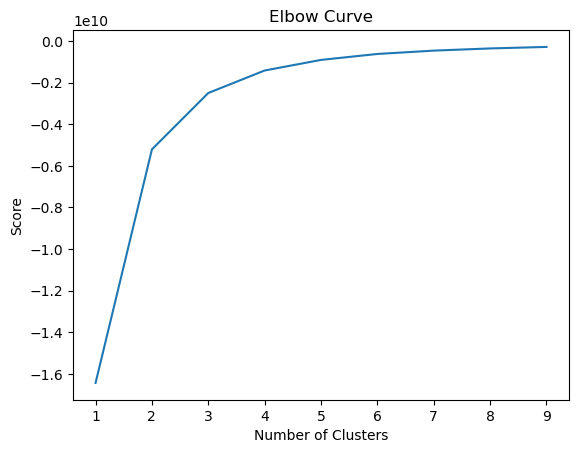

In [109]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [111]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [112]:
# Fit the k-means object to the data.

kmeans.fit(df_bikes_1)

C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [113]:
df_bikes_1['clusters'] = kmeans.fit_predict(df_bikes_1)

C:\Users\ivand\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [114]:
df_bikes_1.head()

,trip_seconds,year_of_birth,Start_Time,Start_Date,clusters
0,993,1968,18,20130909,2
1,581,1983,19,20130912,0
2,361,1989,20,20130918,0
3,561,1988,12,20130928,0
4,2296,1978,18,20130907,1


In [115]:
df_bikes_1['clusters'].value_counts()

clusters
0    29284
2    15465
1     5169
Name: count, dtype: int64

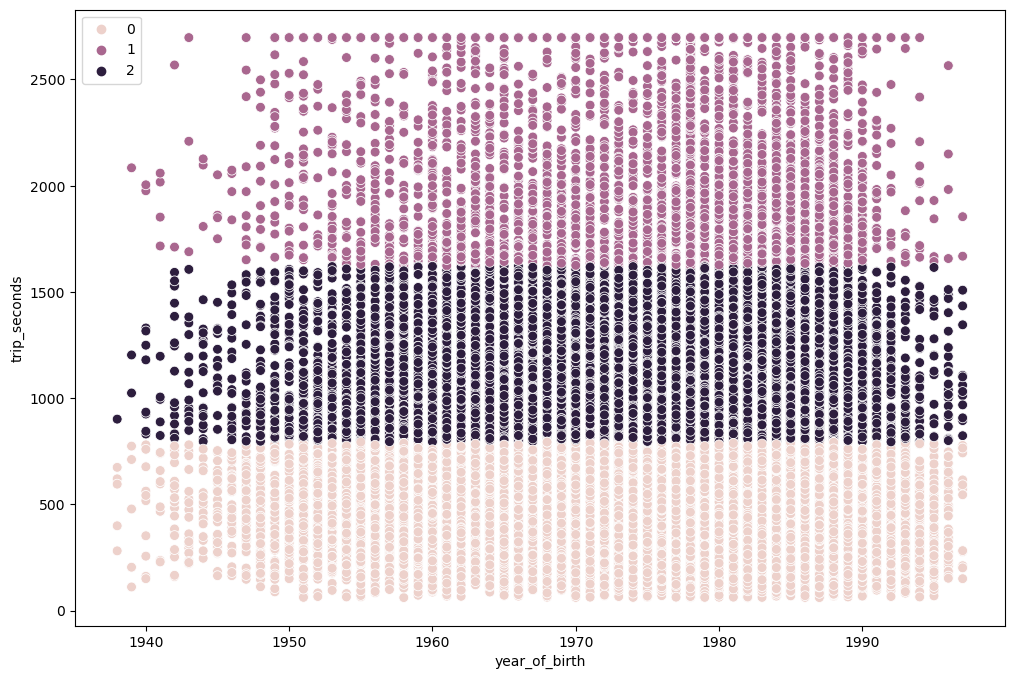

In [120]:
# Plot the clusters for the "year_of_birth" and "trip_seconds" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_bikes_1['year_of_birth'], y=df_bikes_1['trip_seconds'], hue=kmeans.labels_, s=50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year_of_birth') # Label x-axis.
plt.ylabel('trip_seconds') # Label y-axis.
plt.show()

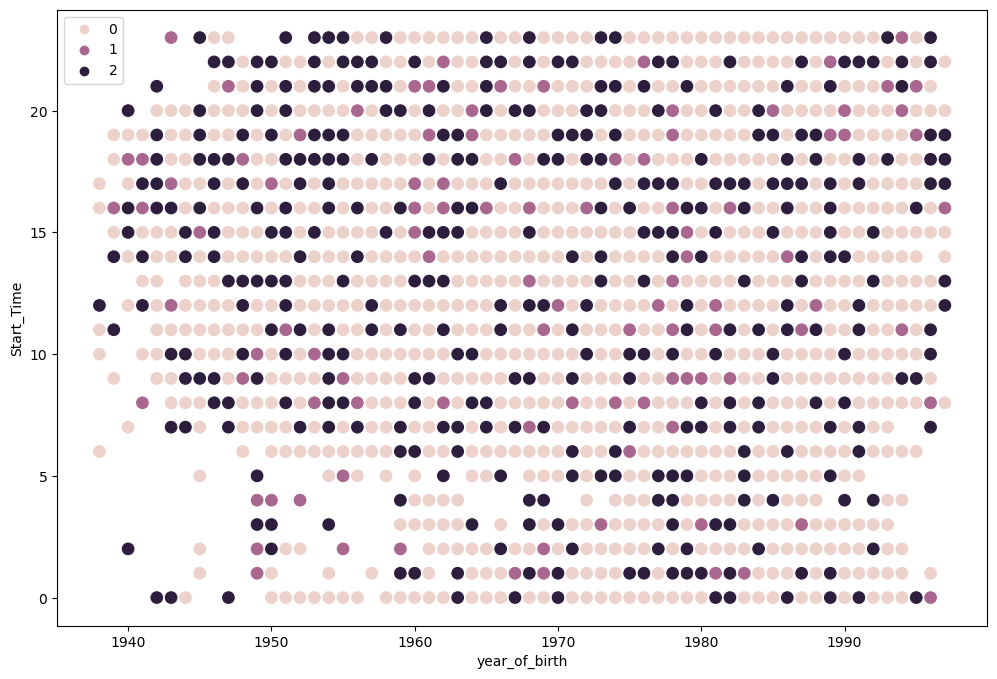

In [122]:
# Plot the clusters for the "year_of_birth" and "start_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_bikes_1['year_of_birth'], y=df_bikes_1['Start_Time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('year_of_birth') # Label x-axis.
plt.ylabel('Start_Time') # Label y-axis.
plt.show()

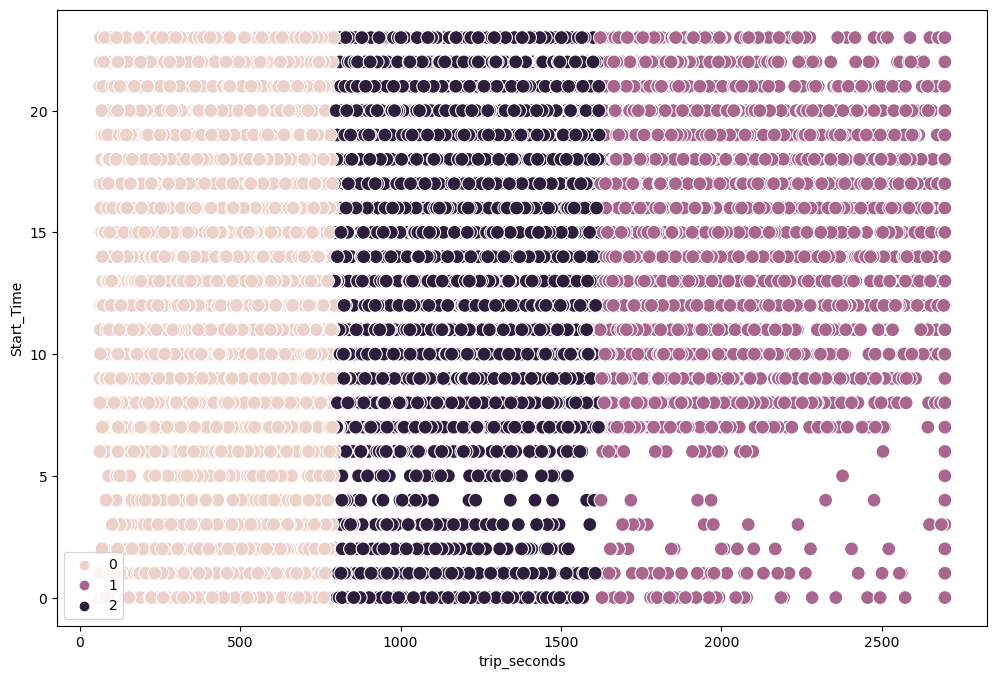

In [123]:
# Plot the clusters for the "trip_seconds" and "start_time" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_bikes_1['trip_seconds'], y=df_bikes_1['Start_Time'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('trip_seconds') # Label x-axis.
plt.ylabel('Start_Time') # Label y-axis.
plt.show()

In [127]:
# Assigning names to the clusters
df_bikes_1.loc[df_bikes_1['clusters'] == 2, 'cluster'] = 'dark purple'
df_bikes_1.loc[df_bikes_1['clusters'] == 1, 'cluster'] = 'purple'
df_bikes_1.loc[df_bikes_1['clusters'] == 0, 'cluster'] = 'pink'

In [128]:
# Showing descriptive cluster statistics

df_bikes_1.groupby('cluster').agg({'trip_seconds':['mean', 'median'],
                          'year_of_birth':['mean', 'median'],
                          'Start_Time':['mean', 'median'],
                          'Start_Date':['mean', 'median']})

trip_seconds         year_of_birth         Start_Time         \
                    mean  median          mean  median       mean median   
cluster                                                                    
dark purple  1127.730165  1092.0   1975.960362  1978.0  14.687294   16.0   
pink          460.675932   457.0   1976.120749  1978.0  14.264855   15.0   
purple       2118.697040  2010.0   1975.796672  1978.0  14.803831   16.0   

               Start_Date              
                     mean      median  
cluster                                
dark purple  2.013092e+07  20130916.0  
pink         2.013092e+07  20130917.0  
purple       2.013092e+07  20130915.0

# Conclusions

- From the first Cluster we see that people at the age of around 70 don't take many trips. People around the age of 60 tend to take significantly more short trips, than long ones.
- The majority of the trip duration is focused around people aged between 53 and 23.

- Second cluster shows us that people aged between 60 and 50 years old don't really start their rides before 7AM. Most of the rides happen between 8AM and 8PM

- Third cluster shows us that rides up to 13 minutes occur during the whole day, between 13 minute and 27 minute rides there's a gap around 4AM, which shows that this trip duration doesn't happen often during this time.

- From half an hour up to an hour rides tend to happen mostly if not almost entirely after 7AM.

# Next Steps

- We could investigate further into why the majority of the trip duration is focused around people aged between 30 and 50 years old.
- Is it because they use the bikes to go to work?
- Why do most of the rides happen between 8AM and 8PM. Are all the stations open 24/7 or just some?